# Space datasets description

In [2]:
import os
import numpy as np
from spacebench import SpaceEnv, DataMaster
import matplotlib.pyplot as plt

In [3]:
space_master = DataMaster().master
space_master = space_master.reset_index()
space_master

,dataset,treatment_type,collection
0,healthd_dmgrcs_mortality_disc,binary,Air Pollution and Mortality
1,cdcsvi_limteng_hburdic_cont,continuous,Social Vulnerability and Welfare
2,climate_relhum_wfsmoke_cont,continuous,Heat Exposure and Wildfires
3,climate_wfsmoke_minrty_disc,binary,Heat Exposure and Wildfires
4,healthd_hhinco_mortality_cont,continuous,Air Pollution and Mortality
5,healthd_pollutn_mortality_cont,continuous,Air Pollution and Mortality
6,county_educatn_election_cont,continuous,Welfare and Elections
7,county_phyactiv_lifexpcy_cont,continuous,Welfare and Elections
8,county_dmgrcs_election_disc,binary,Welfare and Elections
9,cdcsvi_nohsdp_poverty_cont,continuous,Social Vulnerability and Welfare


In [4]:
collections = list(space_master.collection.unique())
collections

['Air Pollution and Mortality',
 'Social Vulnerability and Welfare',
 'Heat Exposure and Wildfires',
 'Welfare and Elections']

In [5]:
space_datasets = DataMaster().list_datasets()
space_datasets

['healthd_dmgrcs_mortality_disc',
 'cdcsvi_limteng_hburdic_cont',
 'climate_relhum_wfsmoke_cont',
 'climate_wfsmoke_minrty_disc',
 'healthd_hhinco_mortality_cont',
 'healthd_pollutn_mortality_cont',
 'county_educatn_election_cont',
 'county_phyactiv_lifexpcy_cont',
 'county_dmgrcs_election_disc',
 'cdcsvi_nohsdp_poverty_cont',
 'cdcsvi_nohsdp_poverty_disc']

In [6]:
os.system("mkdir downloads")
envname = space_datasets[0]
env = SpaceEnv(envname, dir="downloads")
env.__dict__.keys()

mkdir: downloads: File exists


dict_keys(['name', 'datamaster', 'api', 'dir', 'config', 'synthetic_data', 'metadata', 'graph', 'confounding_score_dict', 'smoothness_score_dict'])

In [6]:
for s in space_datasets:
    env = SpaceEnv(s, dir="downloads")

Downloaded: filename cdcsvi_limteng_hburdic_cont.zip, id 7144201, saved to downloads/cdcsvi_limteng_hburdic_cont.zip
Downloaded: filename climate_relhum_wfsmoke_cont.zip, id 7144210, saved to downloads/climate_relhum_wfsmoke_cont.zip
Downloaded: filename climate_wfsmoke_minrty_disc.zip, id 7144211, saved to downloads/climate_wfsmoke_minrty_disc.zip
Downloaded: filename healthd_hhinco_mortality_cont.zip, id 7144202, saved to downloads/healthd_hhinco_mortality_cont.zip
Downloaded: filename healthd_pollutn_mortality_cont.zip, id 7144203, saved to downloads/healthd_pollutn_mortality_cont.zip
Downloaded: filename county_educatn_election_cont.zip, id 7144204, saved to downloads/county_educatn_election_cont.zip
Downloaded: filename county_phyactiv_lifexpcy_cont.zip, id 7144205, saved to downloads/county_phyactiv_lifexpcy_cont.zip
Downloaded: filename county_dmgrcs_election_disc.zip, id 7144206, saved to downloads/county_dmgrcs_election_disc.zip
Downloaded: filename cdcsvi_nohsdp_poverty_cont.

## Summarize number of covariates

In [7]:
num_covars = dict()
for s in space_datasets:
    env = SpaceEnv(s, dir="downloads")
    num_covars[s] = len(env.metadata["covariates"])
num_covars

{'healthd_dmgrcs_mortality_disc': 31,
 'cdcsvi_limteng_hburdic_cont': 12,
 'climate_relhum_wfsmoke_cont': 10,
 'climate_wfsmoke_minrty_disc': 22,
 'healthd_hhinco_mortality_cont': 34,
 'healthd_pollutn_mortality_cont': 35,
 'county_educatn_election_cont': 40,
 'county_phyactiv_lifexpcy_cont': 41,
 'county_dmgrcs_election_disc': 41,
 'cdcsvi_nohsdp_poverty_cont': 10,
 'cdcsvi_nohsdp_poverty_disc': 10}

In [8]:
num_covars = dict()
for c in collections:
    environments = list(space_master.dataset[space_master.collection == c])
    covars = list()
    for e in environments:
        env = SpaceEnv(e, dir="downloads")
        covars.extend(env.metadata["covariates"])
    num_covars[c] = len(set(covars))
num_covars

{'Air Pollution and Mortality': 36,
 'Social Vulnerability and Welfare': 15,
 'Heat Exposure and Wildfires': 22,
 'Welfare and Elections': 47}

## Summarize graph nodes and edges

In [17]:
num_nodes = dict()
for s in space_datasets:
    env = SpaceEnv(s, dir="downloads")
    num_nodes[s] = {
        'nodes': env.graph.number_of_nodes(), #len(list(env.graph))
        'edges': env.graph.number_of_edges() 
    }
num_nodes

{'healthd_dmgrcs_mortality_disc': {'nodes': 3109, 'edges': 9237},
 'cdcsvi_limteng_hburdic_cont': {'nodes': 6828, 'edges': 21585},
 'climate_relhum_wfsmoke_cont': {'nodes': 8616, 'edges': 26695},
 'climate_wfsmoke_minrty_disc': {'nodes': 8616, 'edges': 26695},
 'healthd_hhinco_mortality_cont': {'nodes': 3109, 'edges': 9237},
 'healthd_pollutn_mortality_cont': {'nodes': 3109, 'edges': 9237},
 'county_educatn_election_cont': {'nodes': 3108, 'edges': 9236},
 'county_phyactiv_lifexpcy_cont': {'nodes': 3107, 'edges': 9231},
 'county_dmgrcs_election_disc': {'nodes': 3108, 'edges': 9236},
 'cdcsvi_nohsdp_poverty_cont': {'nodes': 6828, 'edges': 21585},
 'cdcsvi_nohsdp_poverty_disc': {'nodes': 6828, 'edges': 21585}}

##

## Summarize feature importance

In [18]:
env.metadata["outcome_importance"]

{'EP_NOINT': '2.822646393572124',
 'EP_DISABL': '1.6235692236084387',
 'EP_AGE17': '1.4695298624718613',
 'EP_NOVEH': '1.3965648372607187',
 'EP_NOHSDP': '1.2632656819081014',
 'EP_LIMENG': '1.162969002748668',
 'EP_SNGPNT': '1.1185575962103491',
 'EP_AGE65': '0.8608152098576362',
 'EP_MINRTY': '0.8257770764441151',
 'EP_MUNIT': '0.7079269805466126',
 'EP_UNEMP': '0.53526090496491'}

In [19]:
env.metadata["treatment_importance"]

{'EP_LIMENG': '0.33568092161641155',
 'EP_NOINT': '0.1494404102906236',
 'EP_MUNIT': '0.08024022030058642',
 'EP_DISABL': '0.03896010696548912',
 'EP_MINRTY': '0.034320094226272684',
 'EP_NOVEH': '0.021280058424681877',
 'EP_AGE65': '0.016720045905107228',
 'EP_AGE17': '0.01368003755872403',
 'EP_SNGPNT': '0.00640001757133288',
 'EP_UNEMP': '0.0053600147159912175'}

In [20]:
env.metadata["confounding_score"]

{'EP_NOINT': '0.1494404102906236',
 'EP_LIMENG': '0.06958546308363311',
 'EP_MUNIT': '0.04235833169612017',
 'EP_DISABL': '0.03896010696548912',
 'EP_MINRTY': '0.034320094226272684',
 'EP_NOVEH': '0.021280058424681877',
 'EP_AGE65': '0.016720045905107228',
 'EP_AGE17': '0.01368003755872403',
 'EP_SNGPNT': '0.00640001757133288',
 'EP_UNEMP': '0.0053600147159912175'}

In [21]:
conf_score = dict()
for s in space_datasets:
    env = SpaceEnv(s, dir="downloads")
    conf_score[s] = {
        'min': min(env.metadata["confounding_score"].values()), #len(list(env.graph))
        'max': max(env.metadata["confounding_score"].values())
    }
conf_score

{'healthd_dmgrcs_mortality_disc': {'min': '-0.0020631389201740446',
  'max': '0.03894166356775765'},
 'cdcsvi_limteng_hburdic_cont': {'min': '0.011070371878297649',
  'max': '0.11507197526784825'},
 'climate_relhum_wfsmoke_cont': {'min': '0.09331443630395377',
  'max': '0.3556097249352253'},
 'climate_wfsmoke_minrty_disc': {'min': '0.00653333333333328',
  'max': '0.06253333333333326'},
 'healthd_hhinco_mortality_cont': {'min': '0.0036904787008346296',
  'max': '0.04571776388187819'},
 'healthd_pollutn_mortality_cont': {'min': '0.005912432630215656',
  'max': '0.04936122992686385'},
 'county_educatn_election_cont': {'min': '0.0009286561948704933',
  'max': '0.053742471351045075'},
 'county_phyactiv_lifexpcy_cont': {'min': '0.0008399222515778157',
  'max': '0.07534169583912828'},
 'county_dmgrcs_election_disc': {'min': '-0.0006435391517509737',
  'max': '0.09485767096808603'},
 'cdcsvi_nohsdp_poverty_cont': {'min': '0.022899802891527554',
  'max': '0.12201006346348209'},
 'cdcsvi_nohsdp_

In [22]:
conf_score_list = list()
for s in space_datasets:
    env = SpaceEnv(s, dir="downloads")
    conf_score_list.extend(list(env.metadata["confounding_score"].values()))
conf_score = np.array(conf_score_list)
conf_score = conf_score.astype(float)

In [23]:
print(f"min: {conf_score.min()}")
print(f"q25: {np.quantile(conf_score, 0.25)}")
print(f"median: {np.median(conf_score)}")
print(f"mean: {conf_score.mean()}")
print(f"q75: {np.quantile(conf_score, 0.75)}")
print(f"max: {conf_score.max()}")

min: -0.003475111419455089
q25: 0.009098026810474715
median: 0.013891074298352644
mean: 0.024600302003953457
q75: 0.023124950722881805
max: 0.3556097249352253


(array([146.,  90.,  27.,   6.,   2.,   3.,   5.,   1.,   1.,   2.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.]),
 array([-0.00347511,  0.01447913,  0.03243337,  0.05038761,  0.06834186,
         0.0862961 ,  0.10425034,  0.12220458,  0.14015882,  0.15811306,
         0.17606731,  0.19402155,  0.21197579,  0.22993003,  0.24788427,
         0.26583852,  0.28379276,  0.301747  ,  0.31970124,  0.33765548,
         0.35560972]),
 <BarContainer object of 20 artists>)

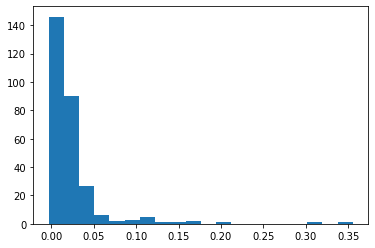

In [24]:
# make a histogram of the confounding scores
plt.hist(conf_score, bins=20)

## Summarize Spatial Smoothness

In [9]:
env.metadata["spatial_scores"]

{'gmet_mean_winter_tmmx': '0.9625116382134297',
 'gmet_mean_winter_rmn': '0.9607264412590117',
 'bin_SOUTH': '0.9583589026748423',
 'qd_mean_pm25': '0.9516419338580774',
 'bin_WEST': '0.9494610272806911',
 'gmet_mean_tmmx': '0.9486087677474231',
 'gmet_mean_summer_sph': '0.9443960669061464',
 'gmet_mean_winter_tmmn': '0.939644339077167',
 'gmet_mean_sph': '0.9384057083876951',
 'gmet_mean_rmn': '0.9336731373766164',
 'gmet_mean_tmmn': '0.9299002910918565',
 'gmet_mean_summer_rmn': '0.9276269627747782',
 'gmet_mean_summer_tmmn': '0.9210582774951698',
 'gmet_mean_summer_rmx': '0.9172865697469688',
 'gmet_mean_winter_sph': '0.9121888429452975',
 'bin_NORTHEAST': '0.9094352330172247',
 'gmet_mean_summer_tmmx': '0.8983694388901349',
 'gmet_mean_rmx': '0.8800394889839397',
 'gmet_mean_winter_rmx': '0.8211646549132919',
 'cs_median_house_value': '0.6869220595686004',
 'cs_ed_below_highschool': '0.6336784184923402',
 'cs_household_income': '0.4763177700129706',
 'cs_poverty': '0.45951336905215

In [12]:
spatial_score_list = list()
for s in space_datasets:
    env = SpaceEnv(s, dir="downloads")
    spatial_score_list.extend(list(env.metadata["spatial_scores"].values()))
spatial_score = np.array(spatial_score_list)
spatial_score = spatial_score.astype(float)

In [13]:
print(f"min: {spatial_score.min()}")
print(f"q25: {np.quantile(spatial_score, 0.25)}")
print(f"median: {np.median(spatial_score)}")
print(f"mean: {spatial_score.mean()}")
print(f"q75: {np.quantile(spatial_score, 0.75)}")
print(f"max: {spatial_score.max()}")

min: 0.02737651003533779
q25: 0.3720776672219303
median: 0.6213007201984886
mean: 0.5876175933063786
q75: 0.8863877698046329
max: 0.9625116382134303


(array([ 9., 17.,  0.,  4.,  9., 22.,  6., 20.,  9., 15.,  6., 18., 17.,
        29.,  8., 10.,  7.,  0., 18., 62.]),
 array([0.02737651, 0.07413327, 0.12089002, 0.16764678, 0.21440354,
        0.26116029, 0.30791705, 0.3546738 , 0.40143056, 0.44818732,
        0.49494407, 0.54170083, 0.58845759, 0.63521434, 0.6819711 ,
        0.72872786, 0.77548461, 0.82224137, 0.86899813, 0.91575488,
        0.96251164]),
 <BarContainer object of 20 artists>)

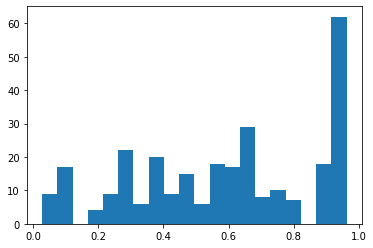

In [14]:
# make a histogram of the confounding scores
plt.hist(spatial_score, bins=20)

## Number of datasets for each level of difficulty

In [30]:
print(f"easy low {np.sum((conf_score < 0.025) & (spatial_score < 0.5))}")
print(f"hard high {np.sum((conf_score > 0.025) & (spatial_score > 0.5))}")
print(f"easy high {np.sum((conf_score < 0.025) & (spatial_score > 0.5))}")
print(f"hard low {np.sum((conf_score > 0.025) & (spatial_score < 0.5))}")


easy low 100
hard high 56
easy high 119
hard low 11


In [31]:
len(conf_score)

286